In [3]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import joblib
import seaborn as sns



In [4]:
# Importando dados de teste 
X_test= pd.read_csv("Train&TestData\\X_test.csv",index_col= False)
y_test= pd.read_csv("Train&TestData\\y_test.csv",index_col= False)


In [5]:
X_test.head()

,ANO_VENCIMENTO,MES_VENCIMENTO,TRIMESTRE,VALOR_FATURA_lag1,VALOR_FATURA_lag2
0,2022,11,4,1732.36,2272.30
1,2023,5,2,4113.00,1421.76
2,2023,8,3,53.64,56.35
3,2024,8,3,36.48,36.49
4,2024,6,2,63.34,63.37


In [6]:
y_test.head()

,VALOR_FATURA
0,3316.07
1,1468.30
2,53.64
3,36.49
4,55.90


In [8]:
# Importando modelo 
rf_model = joblib.load('random_forest.joblib')

# Realizando Previsões 
y_pred = rf_model.predict(X_test)


In [10]:
# Calculando as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Exibindo as métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R²): {r2}")
print(f"Explained Variance Score: {explained_variance}")


Mean Absolute Error (MAE): 772.8763131168163
Mean Squared Error (MSE): 6366712.591199466
Root Mean Squared Error (RMSE): 2523.234549382888
Coefficient of Determination (R²): 0.8501367570171326
Explained Variance Score: 0.8501429779078614


In [21]:
# Criando as datas com base nas colunas de 'ano' e 'mes'
# Criar coluna de datas legíveis
X_test['data'] = (
        X_test['MES_VENCIMENTO'].astype(str) + '/' + X_test['ANO_VENCIMENTO'].astype(str)
    )

X_test['data'] = pd.to_datetime(X_test['data'])
# Exibindo as primeiras linhas para conferir
X_test.head()

C:\Users\maype\AppData\Local\Temp\ipykernel_256\3677516391.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test['data'] = pd.to_datetime(X_test['data'])


,ANO_VENCIMENTO,MES_VENCIMENTO,TRIMESTRE,VALOR_FATURA_lag1,VALOR_FATURA_lag2,data
0,2022,11,4,1732.36,2272.30,2022-11-01
1,2023,5,2,4113.00,1421.76,2023-05-01
2,2023,8,3,53.64,56.35,2023-08-01
3,2024,8,3,36.48,36.49,2024-08-01
4,2024,6,2,63.34,63.37,2024-06-01


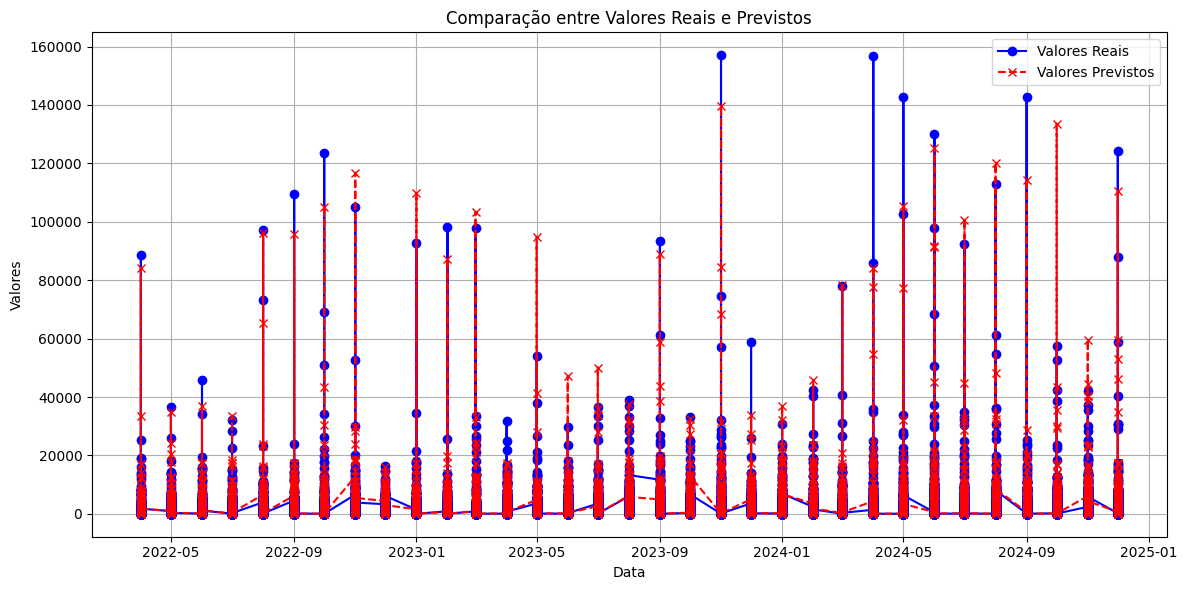

In [29]:
y_pred = pd.DataFrame(y_pred)
# DataFrame para facilitar a manipulação
df = pd.DataFrame({
    'Date': X_test['data'],
    'Actual': y_test['VALOR_FATURA'],
    'Predicted': y_pred[0]
})

# Ordenar por data 
df = df.sort_values('Date')

# Plotar os valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual'], label='Valores Reais', color='blue', linestyle='-', marker='o')
plt.plot(df['Date'], df['Predicted'], label='Valores Previstos', color='red', linestyle='--', marker='x')

# Configurações do gráfico
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

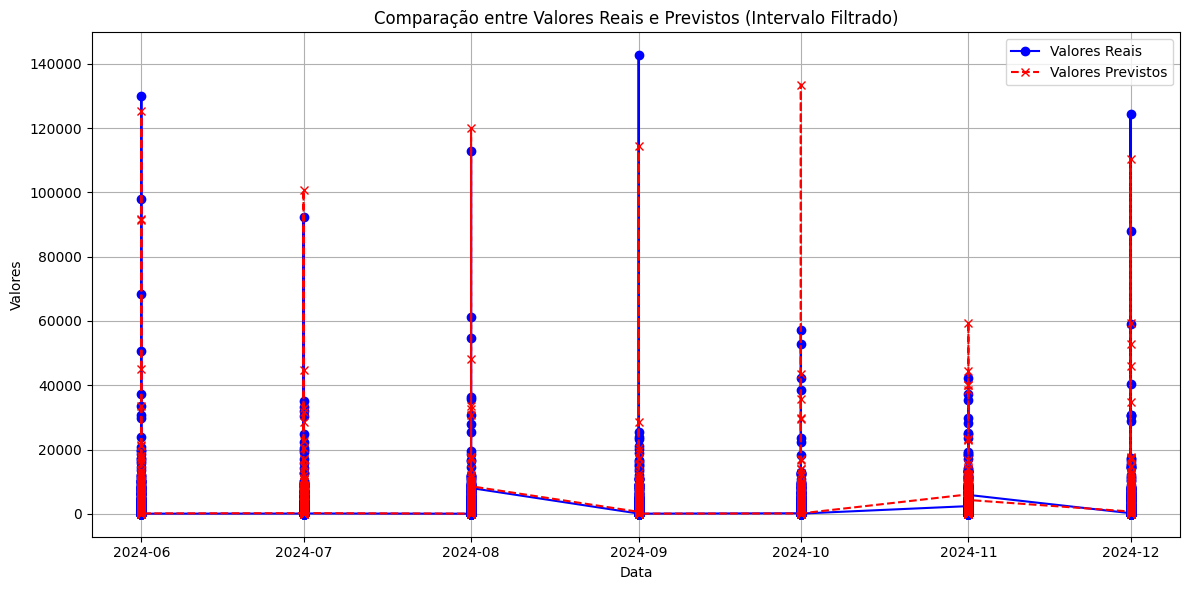

In [30]:
# Filtrar por valores de datas aleatórios (substitua essas datas pelos valores desejados)
start_date = '2024-06-01'  # Substitua por sua data inicial
end_date = '2024-12-01'    # Substitua por sua data final

# Filtrar o DataFrame
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Plotar os valores reais e previstos para o intervalo filtrado
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'], df_filtered['Actual'], label='Valores Reais', color='blue', linestyle='-', marker='o')
plt.plot(df_filtered['Date'], df_filtered['Predicted'], label='Valores Previstos', color='red', linestyle='--', marker='x')

# Configurações do gráfico
plt.title('Comparação entre Valores Reais e Previstos (Intervalo Filtrado)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()